## Importing the dependecies

In [1]:
# ! pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [2]:
# gym stuff
import gym
import gym_anytrading

#Stable baselines
from stable_baselines.common.vec_env import DummyVecEnv #it is a wrapper
from stable_baselines import A2C #A2C is RL algorithm

#processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\Sumit\anaconda3\envs\tf1.5\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


## MarketWatch GME data

In [3]:
df = pd.read_csv('data/SAIL.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


# Coverting date to datetimeformat

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [6]:
# df['Open'] = df['Open'].apply(lambda x: float(x.replace(",","")))

In [7]:
# df['High'] = df['High'].apply(lambda x: float(x.replace(",","")))

In [8]:
# df['Low'] = df['Low'].apply(lambda x: float(x.replace(",","")))

In [9]:
# df['Close'] = df['Close'].apply(lambda x: float(x.replace(",","")))

In [10]:
#Sorting the data from oldest to newest
df.sort_values('Date',ascending=True,inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-18,24.860001,25.549999,24.860001,25.290001,25.290001,1203300
1,2020-06-19,25.400000,25.500000,24.635000,24.750000,24.750000,1710800
2,2020-06-22,24.760000,25.389999,24.750000,25.350000,25.350000,818500
3,2020-06-23,25.730000,25.980000,25.389999,25.910000,25.910000,1671500
4,2020-06-24,25.920000,26.139999,25.368999,25.660000,25.660000,1401100


In [11]:
# Set index as date
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-18,24.860001,25.549999,24.860001,25.290001,25.290001,1203300
2020-06-19,25.400000,25.500000,24.635000,24.750000,24.750000,1710800
2020-06-22,24.760000,25.389999,24.750000,25.350000,25.350000,818500
2020-06-23,25.730000,25.980000,25.389999,25.910000,25.910000,1671500
2020-06-24,25.920000,26.139999,25.368999,25.660000,25.660000,1401100


In [12]:
env = gym.make('stocks-v0',df=df,frame_bound=(5,250),window_size=5)
#window_size = how many previous timestep data our bot is going to have for referce to make a trade
#frame_bound = specifies how much data we want to pass through our environment we are gonna start at 5th time step 
#and go all the way to the hundredth time_step . 

`Note since our window size is 5 and frame_bound's initial value is also 5 our env.prices will start from very first day i.e. 05/25/2021`

`And if our frame bound's initial value is changed to (10,100) from (5,100) our env.prices will start from 5 day later i.e. 05/18/2021`

In [13]:
print("(env.prices\n",env.prices)
print("env.signal_features\n",env.signal_features) #it shows price and change in price from previous timestep


(env.prices
 [25.290001 24.75     25.35     25.91     25.66     26.77     26.58
 26.34     26.469999 28.41     27.82     27.549999 28.059999 28.629999
 28.629999 28.719999 28.09     28.889999 29.629999 30.09     30.34
 30.969999 31.01     31.17     31.65     30.559999 31.25     30.889999
 31.48     31.360001 31.5      31.6      31.24     31.459999 31.5
 36.25     36.02     35.25     35.619999 36.669998 36.490002 36.32
 36.970001 37.700001 38.549999 38.66     38.790001 39.509998 39.009998
 38.18     39.049999 39.23     40.57     40.59     38.610001 38.34
 37.419998 38.200001 37.779999 36.91     38.27     38.18     38.130001
 37.639999 37.52     37.630001 38.240002 37.18     37.080002 37.57
 38.490002 38.439999 39.57     45.580002 45.110001 45.490002 45.93
 46.259998 44.790001 44.599998 45.060001 47.810001 47.02     46.060001
 44.860001 46.110001 45.41     43.830002 45.18     45.52     45.630001
 45.880001 44.540001 42.900002 41.509998 41.950001 42.779999 46.009998
 47.34     45.419998 4

## Build Environment

 n_state
[[46.139999  1.939998]
 [45.580002 -0.559997]
 [46.529999  0.949997]
 [46.759998  0.229999]
 [47.490002  0.730004]]
 reward
0
  done
True
  info
{'total_reward': 19.130027000000023, 'total_profit': 0.5834177082386929, 'position': 0}
 


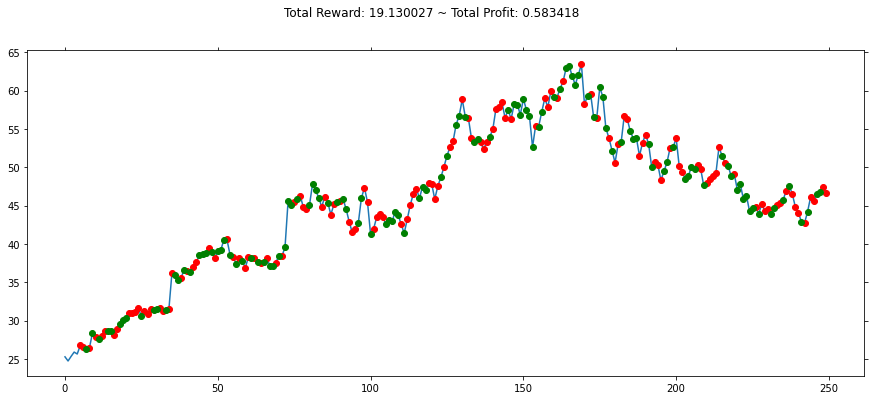

In [14]:
#Taking random steps/ Testing the env
state = env.reset() #it allows us to get initial state
while True:
    action = env.action_space.sample() #looping through each index and taking random action
    n_state,reward,done,info = env.step(action) #applying action to our environment. and storing them in variables
    if done: 
        print(f" n_state\n{n_state}\n reward\n{reward}\n  done\n{done}\n  info\n{info}\n ")
        
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [15]:
env.action_space #we have only 2 action buy and sell

Discrete(2)

# 3.1 - Add Custom Indicators

### 3.1.1 Install and Import New Dependencies

##### `We'll  be using finta`

In [16]:
# !pip install finta
from gym_anytrading.envs import StocksEnv
from finta import TA #Technical Analysis lirary


### 3.1.2 - Fix Volume Column

In [17]:
# print(df.dtypes)
# #inintially volume is object/string changing it to float
# df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",","")))

# # (x.replace",","") stripping/removing all the commas


### 3.1.3 Calculate SMA,RSI and OBV

In [18]:
df['SMA'] = TA.SMA(df,12) #we want 12 period simple movimg average
df['RSI'] = TA.RSI(df) #relative strength index
df['OBV'] = TA.OBV(df) #on balance volume inndicator

df.fillna(0,inplace=True) #removing NAN with 0

In [19]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2020-06-18,24.860001,25.549999,24.860001,25.290001,25.290001,1203300,0.000000,0.000000,0.0
2020-06-19,25.400000,25.500000,24.635000,24.750000,24.750000,1710800,0.000000,0.000000,-1710800.0
2020-06-22,24.760000,25.389999,24.750000,25.350000,25.350000,818500,0.000000,54.474662,-892300.0
2020-06-23,25.730000,25.980000,25.389999,25.910000,25.910000,1671500,0.000000,70.582129,779200.0
2020-06-24,25.920000,26.139999,25.368999,25.660000,25.660000,1401100,0.000000,60.321321,-621900.0
2020-06-25,25.889999,26.900000,25.670000,26.770000,26.770000,1693200,0.000000,76.592289,1071300.0
2020-06-26,26.860001,28.000000,26.030001,26.580000,26.580000,2376300,0.000000,71.209476,-1305000.0
2020-06-29,26.830000,26.889999,26.000000,26.340000,26.340000,1773100,0.000000,64.995758,-3078100.0
2020-06-30,26.309999,26.580000,26.110001,26.469999,26.469999,1851200,0.000000,66.691212,-1226900.0


#### 3.1.4 Create New Environment

In [20]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size #here env.frame_bound[0] = 5
    end = env.frame_bound[1] # here env.frame_bound[1] = 250
    prices = env.df.loc[:,'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:,['Low','Volume','SMA','RSI','OBV']].to_numpy()[start:end] 
    return prices,signal_features

In [21]:
#Creating custom env
class MyCustomEnv(StocksEnv): #inheritence is happening here
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df,window_size=12,frame_bound=(12,50)) #creating instance

In [22]:
env2.prices

array([24.860001, 24.635   , 24.75    , 25.389999, 25.368999, 25.67    ,
       26.030001, 26.      , 26.110001, 27.66    , 27.719999, 27.465   ,
       27.559999, 27.995001, 28.309999, 28.275   , 28.049999, 27.83    ,
       28.459999, 29.030001, 29.927   , 30.5     , 30.775   , 31.      ,
       30.950001, 30.34    , 30.67    , 30.780001, 31.01    , 30.48    ,
       30.799999, 31.045   , 30.879999, 31.360001, 31.370001, 35.25    ,
       35.310001, 35.040001, 35.134998, 35.509998, 36.294998, 36.09    ,
       36.099998, 36.93    , 37.240002, 38.      , 38.370998, 38.389999,
       38.360001, 37.689999])

In [23]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2020-06-18,24.860001,25.549999,24.860001,25.290001,25.290001,1203300,0.0,0.000000,0.0
2020-06-19,25.400000,25.500000,24.635000,24.750000,24.750000,1710800,0.0,0.000000,-1710800.0
2020-06-22,24.760000,25.389999,24.750000,25.350000,25.350000,818500,0.0,54.474662,-892300.0
2020-06-23,25.730000,25.980000,25.389999,25.910000,25.910000,1671500,0.0,70.582129,779200.0
2020-06-24,25.920000,26.139999,25.368999,25.660000,25.660000,1401100,0.0,60.321321,-621900.0


In [24]:
env2.signal_features

array([[ 2.48600010e+01,  1.20330000e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 2.46350000e+01,  1.71080000e+06,  0.00000000e+00,
         0.00000000e+00, -1.71080000e+06],
       [ 2.47500000e+01,  8.18500000e+05,  0.00000000e+00,
         5.44746622e+01, -8.92300000e+05],
       [ 2.53899990e+01,  1.67150000e+06,  0.00000000e+00,
         7.05821290e+01,  7.79200000e+05],
       [ 2.53689990e+01,  1.40110000e+06,  0.00000000e+00,
         6.03213207e+01, -6.21900000e+05],
       [ 2.56700000e+01,  1.69320000e+06,  0.00000000e+00,
         7.65922895e+01,  1.07130000e+06],
       [ 2.60300010e+01,  2.37630000e+06,  0.00000000e+00,
         7.12094764e+01, -1.30500000e+06],
       [ 2.60000000e+01,  1.77310000e+06,  0.00000000e+00,
         6.49957577e+01, -3.07810000e+06],
       [ 2.61100010e+01,  1.85120000e+06,  0.00000000e+00,
         6.66912120e+01, -1.22690000e+06],
       [ 2.76600000e+01,  3.27810000e+06,  0.00000000e+00,
         8.12705357e+01

## Building Environment and Training

In [25]:
#Wrapping our environment inside of dummyvenEnv
env_maker = lambda:env2
# env_maker = lambda:gym.make('stocks-v0',df=df, frame_bound=(5,100),window_size=5)

env  = DummyVecEnv([env_maker])

#we are creatinng env_makr function and putting it inside DummyvecEnv wrapper



In [26]:
#Start Training
model = A2C('MlpLstmPolicy',env,verbose=1) #multilayer-perceptron -lstm policy
model.learn(total_timesteps=100000) #starting to learn





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


----------------------------------
| explained_variance | -6.97e+03 |
| fps                | 3         |
| nupdates           | 1         |
| policy_entropy     | 0.693     |
| total_timesteps    | 5         |
| value_loss         | 0.00175   |
----------------------------------
---------------------------------
| explained_variance | -254     |
| fps                | 152      |
| nupdates           | 100      |
| policy_entropy     | 0.69     |
| total_timesteps    | 500      |
| value_loss         | 0.00129  |
---------------------------------
---------------------------------
| explained_variance | 0.0296   |
| fps                | 

## Testing the model

In [27]:
# env = gym.make('stocks-v0',df=df,frame_bound=(5,2000),window_size=5)
env = MyCustomEnv(df=df,window_size=12,frame_bound=(230,300))
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...] #taking observation
    #reshaping using np.newaxis to be able to work with nnon-vectorized environment 
    action,_states = model.predict(obs) #rather than using random action we are using our model and predicting which action it shoudl take
    obs,reward,done,info = env.step(action) 
    if done:
        print("info",info)
        print("action is",action)
        break
    

info {'total_reward': -1.03999799999999, 'total_profit': 0.8786148425890663, 'position': 0}
action is [0]


# Visualising our model

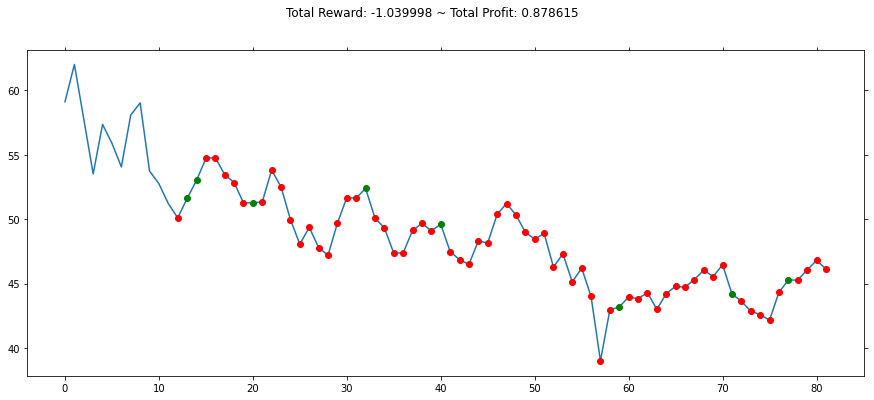

In [28]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()

plt.savefig("SAIL1.png",dpi=100)
plt.show()

In [29]:
! git add "SAILstocksTrader.ipynb"
! git commit -m "SAIL"
! git push origin main

The file will have its original line endings in your working directory


[main 8b46a2e] HDFC
 1 file changed, 47 insertions(+), 11 deletions(-)


To https://github.com/sumit-mandal/Reinforcement-Learning-Project
   21b8272..8b46a2e  main -> main
